In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# adjust configurations of plots

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
# check for missing data

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col, missing))

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [5]:
print(df.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [6]:
# dealing with missing data

df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [7]:
df['rating'].fillna('Unrated', inplace=True)

In [8]:
print(df[df['released'].isnull()])
print(df[df['score'].isnull()])
print(df[df['votes'].isnull()])
print(df[df['writer'].isnull()])
print(df[df['star'].isnull()])
print(df[df['country'].isnull()])
print(df[df['company'].isnull()])
print(df[df['runtime'].isnull()])

                        name rating  genre  year released  score     votes  \
5728  Saw: The Final Chapter      R  Crime  2010      NaN    5.6   93000.0   
5730             The Wolfman      R  Drama  2010      NaN    5.8  104000.0   

            director               writer              star country  budget  \
5728  Kevin Greutert       Patrick Melton        Tobin Bell     NaN     NaN   
5730    Joe Johnston  Andrew Kevin Walker  Benicio Del Toro     NaN     NaN   

      gross company  runtime  
5728    NaN     NaN      NaN  
5730    NaN     NaN      NaN  
                  name   rating   genre  year  \
7661  Love by Drowning        R   Drama  2020   
7662     The Robinsons  Unrated  Action  2020   
7666      It's Just Us  Unrated   Drama  2020   

                               released  score  votes           director  \
7661   November 6, 2020 (United States)    NaN    NaN  Justin Kreinbrink   
7662  November 10, 2020 (United States)    NaN    NaN          Directors   
7666    O

In [14]:
df = df.dropna(axis = 0, subset = ['released', 'score', 'votes', 'writer', 'star', 'country', 'company', 'runtime'])

In [18]:
df['budget'].interpolate(method='linear', direction = 'forward', inplace=True)
print(df['budget'])

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7658        5000.0
7659        5000.0
7660        5000.0
7664        5000.0
7667        5000.0
Name: budget, Length: 7643, dtype: float64


<ipython-input-18-da57533c0e73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'].interpolate(method='linear', direction = 'forward', inplace=True)


In [23]:
df['gross'].fillna(int(df['gross'].mean()), inplace=True)
print(df['gross'])

0        46998772.0
1        58853106.0
2       538375067.0
3        83453539.0
4        39846344.0
           ...     
7658     78614324.0
7659        13266.0
7660     78614324.0
7664     78614324.0
7667     78614324.0
Name: gross, Length: 7643, dtype: float64


In [30]:
# sort out data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [33]:
# get rid of .0s

df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

<ipython-input-33-8a0130b20fb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = df['budget'].astype('int64')
<ipython-input-33-8a0130b20fb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['votes'] = df['votes'].astype('int64')
<ipython-input-33-8a0130b20fb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [47]:
# create year column ensuring year is correct

df['stringyear'] = df['released'].str.split(" ")
df['actualyear'] = df['stringyear'].str[2]

In [49]:
df.drop(['stringyear'], axis=1, inplace=True)

In [57]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [53]:
pd.set_option('display.max_rows', None)

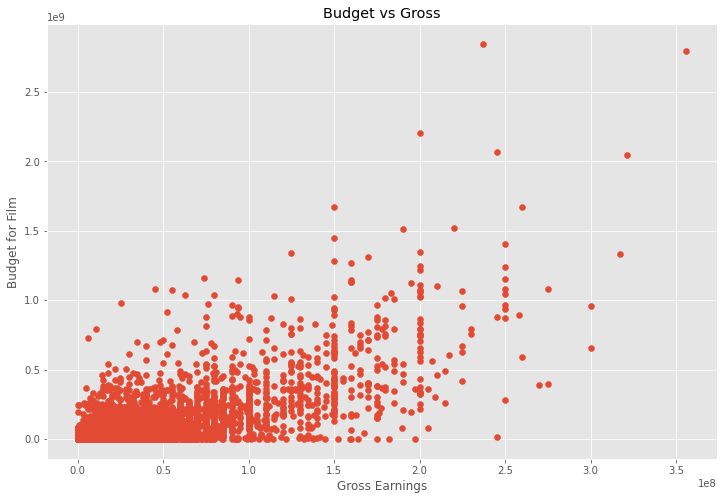

In [60]:
# find correlation in data

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

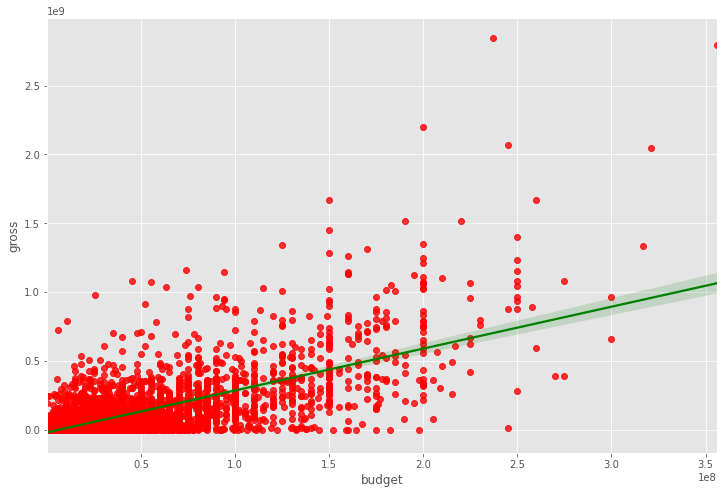

In [63]:
# perform regression on budget vs gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'green'})

In [64]:
df.corr(method='pearson')

# Presence of high correlation between budget and gross

year     score     votes    budget     gross   runtime
year     1.000000  0.098278  0.223353  0.353436  0.252422  0.119789
score    0.098278  1.000000  0.409432  0.081446  0.182861  0.399965
votes    0.223353  0.409432  1.000000  0.448537  0.628735  0.308907
budget   0.353436  0.081446  0.448537  1.000000  0.702313  0.271021
gross    0.252422  0.182861  0.628735  0.702313  1.000000  0.241290
runtime  0.119789  0.399965  0.308907  0.271021  0.241290  1.000000

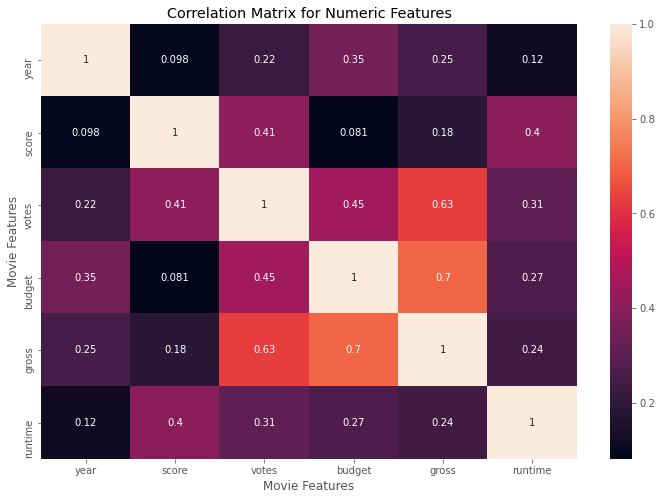

In [67]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [68]:
# aim is to include company in matrix

In [71]:
# change datatypes

df_numeric = df

for col_name in df_numeric.columns:
    if (df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes

In [72]:
df_numeric

name  rating  genre  year  \
5445                                             Avatar       5      0  2009   
7445                                  Avengers: Endgame       5      0  2019   
3045                                            Titanic       5      6  1997   
6663         Star Wars: Episode VII - The Force Awakens       5      0  2015   
7244                             Avengers: Infinity War       5      0  2018   
7480                                      The Lion King       4      2  2019   
6653                                     Jurassic World       5      0  2015   
6043                                       The Avengers       5      0  2012   
6646                                          Furious 7       5      0  2015   
7494                                          Frozen II       4      2  2019   
6644                            Avengers: Age of Ultron       5      0  2015   
7247                                      Black Panther       5      0  2018   
5845       Harry Potter and the Deathly Hallows: Part 2       5      1  2011   
7075            Star Wars: Episode VIII - The Last Jedi       5      0  2017   
7271                     Jurassic World: Fallen Kingdom       5      0  2018   
6262                                             Frozen       4      2  2013   
7072                               Beauty and the Beast       4      7  2017   
7281                                      Incredibles 2       4      2  2018   
7055                            The Fate of the Furious       5      0  2017   
6244                                         Iron Man 3       5      0  2013   
6688                                            Minions       4      2  2015   
6846                         Captain America: Civil War       5      0  2016   
7250                                            Aquaman       5      0  2018   
4245      The Lord of the Rings: The Return of the King       5      0  2003   
7458                          Spider-Man: Far from Home       5      0  2019   
7456                                     Captain Marvel       5      0  2019   
5878                     Transformers: Dark of the Moon       5      0  2011   
6059                                            Skyfall       5      0  2012   
6494                    Transformers: Age of Extinction       5      0  2014   
2448                                      The Lion King       1      2  1994   
6047                              The Dark Knight Rises       5      0  2012   
7463      Star Wars: Episode IX - The Rise of Skywalker       5      0  2019   
7450                                              Joker       6      5  2019   
7488                                        Toy Story 4       1      2  2019   
5685                                        Toy Story 3       1      2  2010   
4852         Pirates of the Caribbean: Dead Man's Chest       5      0  2006   
6869                       Rogue One: A Star Wars Story       5      0  2016   
7481                                            Aladdin       4      1  2019   
5860        Pirates of the Caribbean: on Stranger Tides       5      0  2011   
7140                                    Despicable Me 3       4      2  2017   
2245                                      Jurassic Park       5      0  1993   
6908                                       Finding Dory       4      2  2016   
3451          Star Wars: Episode I - The Phantom Menace       4      0  1999   
5667                                Alice in Wonderland       4      1  2010   
6863                                           Zootopia       4      2  2016   
6045                  The Hobbit: An Unexpected Journey       5      1  2012   
3843              Harry Potter and the Sorcerer's Stone       4      1  2001   
5243                                    The Dark Knight       5      0  2008   
5652       Harry Potter and the Deathly Hallows: Part 1       5      1  2010   
6311                                    Despicable 

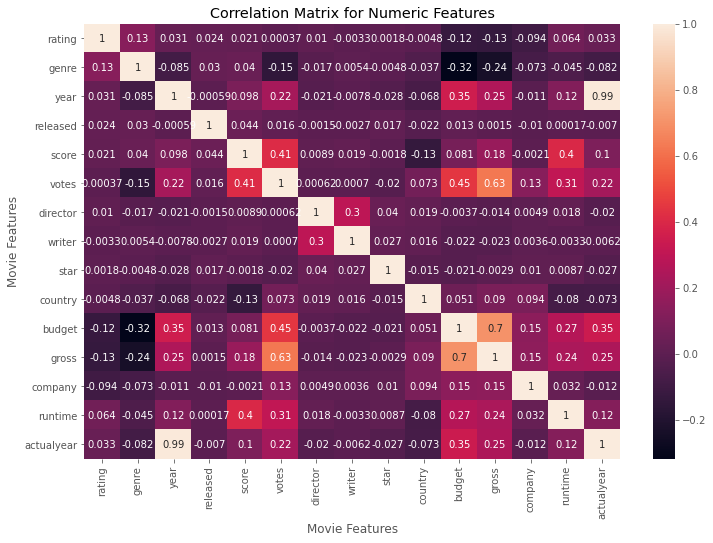

In [73]:
correlation_matrix = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [74]:
# unstacking

correlation_mat = df_numeric.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

rating      rating        1.000000
            genre         0.131770
            year          0.030888
            released      0.023979
            score         0.021478
            votes         0.000367
            director      0.010312
            writer       -0.003322
            star          0.001772
            country      -0.004777
            budget       -0.122584
            gross        -0.128842
            company      -0.094326
            runtime       0.064016
            actualyear    0.033424
genre       rating        0.131770
            genre         1.000000
            year         -0.084693
            released      0.030113
            score         0.039793
            votes        -0.150201
            director     -0.016630
            writer        0.005389
            star         -0.004816
            country      -0.036919
            budget       -0.317278
            gross        -0.237932
            company      -0.072765
            runtime 

In [78]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget      genre        -0.317278
genre       budget       -0.317278
gross       genre        -0.237932
genre       gross        -0.237932
votes       genre        -0.150201
genre       votes        -0.150201
score       country      -0.133115
country     score        -0.133115
rating      gross        -0.128842
gross       rating       -0.128842
budget      rating       -0.122584
rating      budget       -0.122584
            company      -0.094326
company     rating       -0.094326
year        genre        -0.084693
genre       year         -0.084693
actualyear  genre        -0.082009
genre       actualyear   -0.082009
runtime     country      -0.080025
country     runtime      -0.080025
actualyear  country      -0.073002
country     actualyear   -0.073002
company     genre        -0.072765
genre       company      -0.072765
year        country      -0.068436
country     year         -0.068436
genre       runtime      -0.045087
runtime     genre        -0.045087
genre       country 

In [90]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes       gross         0.628735
gross       votes         0.628735
            budget        0.702313
budget      gross         0.702313
year        actualyear    0.991634
actualyear  year          0.991634
rating      rating        1.000000
writer      writer        1.000000
company     company       1.000000
gross       gross         1.000000
budget      budget        1.000000
country     country       1.000000
star        star          1.000000
director    director      1.000000
votes       votes         1.000000
score       score         1.000000
released    released      1.000000
year        year          1.000000
genre       genre         1.000000
runtime     runtime       1.000000
actualyear  actualyear    1.000000
dtype: float64

In [ ]:
# votes and gross earnings have the highest correlation